In [1]:
# Load all libraries
import rasterio
import numpy as np
import pandas as pd
import os
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create the column names of dataframe from indices' names
colNames = []
folder = 'masked'
i = 0
for subfolder in os.listdir(folder):
    for filename in os.listdir(os.path.join(folder, subfolder)):
        img_name = filename.split('_')[1]
        colNames.append(img_name)
    i += 1
    if i > 0:
        break

In [3]:
colNames

['awei',
 'blue',
 'dbsi',
 'evi',
 'green',
 'kndvi',
 'mndmi',
 'ndbi',
 'ndpi',
 'ndvi',
 'ndwi',
 'nir',
 'osavi',
 'red',
 'savi',
 'str11',
 'str12',
 'VH',
 'VV-VH',
 'VV']

In [4]:
colNames.append('class')

In [5]:
colNames

['awei',
 'blue',
 'dbsi',
 'evi',
 'green',
 'kndvi',
 'mndmi',
 'ndbi',
 'ndpi',
 'ndvi',
 'ndwi',
 'nir',
 'osavi',
 'red',
 'savi',
 'str11',
 'str12',
 'VH',
 'VV-VH',
 'VV',
 'class']

In [6]:
df = pd.DataFrame(columns = colNames)

In [7]:
df

,awei,blue,dbsi,evi,green,kndvi,mndmi,ndbi,ndpi,ndvi,...,nir,osavi,red,savi,str11,str12,VH,VV-VH,VV,class


In [8]:
# Get the values of images in one dataframe, excluding from it zero class
for subfolder in os.listdir(folder):
    x = len([name for name in os.listdir(os.path.join(folder, subfolder)) if os.path.isfile(os.path.join(folder, subfolder, name))])
    i = 0
    array = {}
    for filename in os.listdir(os.path.join(folder, subfolder)):
        if i < x:
            img = rasterio.open(os.path.join(folder, subfolder, filename))
            array[f'var{i}'] = img.read()
            i += 1
    imgy =  rasterio.open('images/LU/vector_shr.tif')
    array[f'var{i+1}'] = imgy.read()
    arra = np.concatenate(list(array.values()),0)
    df_img = pd.DataFrame(arra.reshape([x+1,-1]).T, columns=colNames)
    df_filtered = df_img[df_img['class'] > 0]
    df = pd.concat([df, df_filtered])

In [9]:
df.head()

,awei,blue,dbsi,evi,green,kndvi,mndmi,ndbi,ndpi,ndvi,...,nir,osavi,red,savi,str11,str12,VH,VV-VH,VV,class
22,-7284.5,610.0,-0.009806,1.374059,922.0,0.301296,-0.547818,-0.016822,0.547818,0.557623,...,3264.0,1.136190e+07,927.0,14693303.25,9.202947,1.620939,0.034754,1.605517e+00,0.055798,2.0
23,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.00,0.000000,0.000000,-99999.000000,-3.402823e+38,-99999.000000,2.0
7680,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000e+00,0.0,0.00,0.000000,0.000000,-99999.000000,-3.402823e+38,-99999.000000,2.0
7681,-7900.0,537.0,-0.057778,1.515960,879.0,0.368768,-0.564312,-0.059314,0.564312,0.622090,...,3554.0,1.385709e+07,828.0,17920042.50,9.202947,1.620939,0.049378,1.831056e+00,0.090413,2.0
7682,-7422.0,543.0,-0.088723,1.724159,801.0,0.393662,-0.556356,-0.111884,0.556356,0.645078,...,3518.0,1.368879e+07,759.0,17702433.75,4.654982,2.450315,0.044270,2.396279e+00,0.106083,2.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16572438 entries, 22 to 74067911
Data columns (total 21 columns):
 #   Column  Dtype  
---  ------  -----  
 0   awei    float64
 1   blue    float64
 2   dbsi    float64
 3   evi     float64
 4   green   float64
 5   kndvi   float64
 6   mndmi   float64
 7   ndbi    float64
 8   ndpi    float64
 9   ndvi    float64
 10  ndwi    float64
 11  nir     float64
 12  osavi   float64
 13  red     float64
 14  savi    float64
 15  str11   float64
 16  str12   float64
 17  VH      float64
 18  VV-VH   float64
 19  VV      float64
 20  class   float64
dtypes: float64(21)
memory usage: 2.7 GB


In [11]:
df.describe()

,awei,blue,dbsi,evi,green,kndvi,mndmi,ndbi,ndpi,ndvi,...,nir,osavi,red,savi,str11,str12,VH,VV-VH,VV,class
count,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,...,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07,1.657244e+07
mean,-3.747924e+03,5.876060e+02,-6.346173e-02,inf,8.149287e+02,2.748053e-01,-2.902002e-01,-1.034730e-01,2.902002e-01,3.536619e-01,...,2.301445e+03,1.014733e+07,8.667879e+02,1.312372e+07,9.391161e+00,1.403564e+01,-1.026277e+04,-6.283698e+37,-1.026270e+04,2.284466e+00
std,2.699188e+03,5.654224e+02,2.626063e-01,NaN,6.706849e+02,3.051304e-01,2.338220e-01,2.574563e-01,2.338220e-01,3.849920e-01,...,1.492161e+03,2.710221e+07,9.087829e+02,3.504955e+07,1.424038e+01,1.759163e+01,3.034707e+04,1.320372e+38,3.034709e+04,1.514720e+00
min,-1.475175e+04,0.000000e+00,-1.461353e+00,-3.276500e+05,0.000000e+00,0.000000e+00,-9.985826e-01,-9.655172e-01,-9.933222e-01,-9.975845e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.999900e+04,-3.402823e+38,-9.999900e+04,1.000000e+00
25%,-5.804250e+03,2.170000e+02,-3.147534e-01,8.205790e-02,4.010000e+02,2.735512e-03,-4.629274e-01,-3.464567e-01,1.524273e-01,2.890604e-02,...,9.430000e+02,9.411796e+05,2.210000e+02,1.217188e+06,1.270334e+00,1.679900e+00,3.622310e-03,1.606120e+00,1.871508e-02,1.000000e+00
50%,-4.116500e+03,3.740000e+02,0.000000e+00,5.299690e-01,6.370000e+02,8.729945e-02,-3.427914e-01,0.000000e+00,3.427914e-01,1.738318e-01,...,2.632000e+03,3.913847e+06,4.600000e+02,5.061375e+06,5.969032e+00,7.869031e+00,1.341981e-02,3.777418e+00,6.724320e-02,2.000000e+00
75%,-1.087250e+03,9.890000e+02,1.795070e-01,2.255060e+00,1.284000e+03,5.652301e-01,-1.524273e-01,8.747640e-02,4.629274e-01,7.623022e-01,...,3.340000e+03,1.370639e+07,1.620000e+03,1.772572e+07,1.193744e+01,2.069430e+01,2.576177e-02,7.214098e+00,1.222350e-01,3.000000e+00
max,4.900750e+03,8.992000e+03,1.941472e+00,inf,8.336000e+03,1.000000e+00,9.933222e-01,9.989817e-01,9.985826e-01,9.996169e-01,...,8.464000e+03,1.163489e+09,8.056000e+03,1.504545e+09,1.270020e+02,1.270020e+02,1.193557e+01,1.063774e+04,1.836451e+02,6.000000e+00


In [12]:
# Save the dataframe in csv file
df.to_csv('LU_data.csv', index=False)

In [13]:
#df = pd.read_csv('LU_data.csv')

In [14]:
df['class'].value_counts()

class
1.0    8249229
3.0    4545234
5.0    1583460
2.0     983439
6.0     622881
4.0     588195
Name: count, dtype: int64

In [15]:
# Check for infinity values
np.isinf(df).values.sum() 

406

In [16]:
# Check at which column the infinity values are
df.columns.to_series()[np.isinf(df).any()]

evi    evi
dtype: object

In [17]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
df.isnull().sum()

awei       0
blue       0
dbsi       0
evi      408
green      0
kndvi      0
mndmi      0
ndbi       0
ndpi       0
ndvi       0
ndwi       0
nir        0
osavi      0
red        0
savi       0
str11      0
str12      0
VH         0
VV-VH      0
VV         0
class      0
dtype: int64

In [19]:
df.dropna(subset=['evi'], inplace=True)

In [20]:
df.isnull().sum()

awei     0
blue     0
dbsi     0
evi      0
green    0
kndvi    0
mndmi    0
ndbi     0
ndpi     0
ndvi     0
ndwi     0
nir      0
osavi    0
red      0
savi     0
str11    0
str12    0
VH       0
VV-VH    0
VV       0
class    0
dtype: int64

In [21]:
df.drop(df[df['VV'] <= -99999].index, inplace=True)

In [22]:
df['class'].value_counts()

class
1.0    7066137
3.0    3998230
5.0     937828
2.0     751599
6.0     584653
4.0     169713
Name: count, dtype: int64

Class=2.0, n=7066137 (16.666666666666664)
Class=6.0, n=7066137 (16.666666666666664)
Class=5.0, n=7066137 (16.666666666666664)
Class=4.0, n=7066137 (16.666666666666664)
Class=1.0, n=7066137 (16.666666666666664)
Class=3.0, n=7066137 (16.666666666666664)


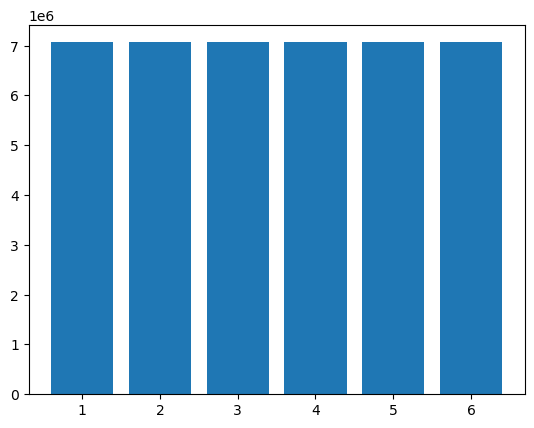

In [23]:
# Balance between the classes by using SMOTE
oversample = SMOTE()
data = df.values
X, y = data[:, :-1], data[:, -1]
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class={}, n={} ({})'.format(k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [24]:
X.dtype

dtype('float64')

In [25]:
X.shape

(42396822, 20)

In [26]:
# Combine X and y in one array
arrayz = np.column_stack((X, y))

In [27]:
arrayz

array([[-7.28450000e+03,  6.10000000e+02, -9.80592126e-03, ...,
         1.60551655e+00,  5.57978377e-02,  2.00000000e+00],
       [-7.90000000e+03,  5.37000000e+02, -5.77781020e-02, ...,
         1.83105636e+00,  9.04133692e-02,  2.00000000e+00],
       [-7.42200000e+03,  5.43000000e+02, -8.87227458e-02, ...,
         2.39627934e+00,  1.06082849e-01,  2.00000000e+00],
       ...,
       [ 7.83956540e+02,  2.32060546e+02,  2.87686904e-01, ...,
         6.52893153e+00,  1.05734351e-02,  6.00000000e+00],
       [ 5.34390856e+02,  1.78607001e+02,  8.39163013e-02, ...,
         9.88952247e+00,  2.54077492e-02,  6.00000000e+00],
       [-2.60859849e+03,  5.10335693e+02, -3.37733915e-01, ...,
         2.24277926e+00,  6.33956977e-02,  6.00000000e+00]])

In [28]:
df = pd.DataFrame(arrayz, columns=colNames)

In [29]:
df.head()

,awei,blue,dbsi,evi,green,kndvi,mndmi,ndbi,ndpi,ndvi,...,nir,osavi,red,savi,str11,str12,VH,VV-VH,VV,class
0,-7284.50,610.0,-0.009806,1.374059,922.0,0.301296,-0.547818,-0.016822,0.547818,0.557623,...,3264.0,1.136190e+07,927.0,14693303.25,9.202947,1.620939,0.034754,1.605517,0.055798,2.0
1,-7900.00,537.0,-0.057778,1.515960,879.0,0.368768,-0.564312,-0.059314,0.564312,0.622090,...,3554.0,1.385709e+07,828.0,17920042.50,9.202947,1.620939,0.049378,1.831056,0.090413,2.0
2,-7422.00,543.0,-0.088723,1.724159,801.0,0.393662,-0.556356,-0.111884,0.556356,0.645078,...,3518.0,1.368879e+07,759.0,17702433.75,4.654982,2.450315,0.044270,2.396279,0.106083,2.0
3,-7098.75,626.0,-0.054293,1.575924,875.0,0.333244,-0.534327,-0.083161,0.534327,0.588619,...,3406.0,1.255505e+07,882.0,16236261.00,8.391953,15.382768,0.038807,3.406703,0.132205,2.0
4,-7587.75,571.0,-0.108595,1.822371,849.0,0.402985,-0.545016,-0.117674,0.545016,0.653611,...,3652.0,1.479272e+07,765.0,19129983.75,8.391953,15.382768,0.062089,2.151642,0.133593,2.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42396822 entries, 0 to 42396821
Data columns (total 21 columns):
 #   Column  Dtype  
---  ------  -----  
 0   awei    float64
 1   blue    float64
 2   dbsi    float64
 3   evi     float64
 4   green   float64
 5   kndvi   float64
 6   mndmi   float64
 7   ndbi    float64
 8   ndpi    float64
 9   ndvi    float64
 10  ndwi    float64
 11  nir     float64
 12  osavi   float64
 13  red     float64
 14  savi    float64
 15  str11   float64
 16  str12   float64
 17  VH      float64
 18  VV-VH   float64
 19  VV      float64
 20  class   float64
dtypes: float64(21)
memory usage: 6.6 GB


In [31]:
df.describe()

,awei,blue,dbsi,evi,green,kndvi,mndmi,ndbi,ndpi,ndvi,...,nir,osavi,red,savi,str11,str12,VH,VV-VH,VV,class
count,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,...,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07,4.239682e+07
mean,-3.278839e+03,7.104759e+02,-2.480964e-02,-1.134006e+01,9.630786e+02,3.165009e-01,-2.487830e-01,-3.199754e-02,2.487830e-01,2.735927e-01,...,2.154665e+03,1.313833e+07,1.022287e+03,1.699444e+07,1.728272e+01,2.140253e+01,1.958032e-02,7.972907e+00,1.039137e-01,3.500000e+00
std,2.538068e+03,4.901115e+02,2.891820e-01,3.153732e+03,5.472395e+02,3.472929e-01,3.015254e-01,2.862486e-01,3.015254e-01,3.863221e-01,...,1.236246e+03,3.006520e+07,7.908405e+02,3.888414e+07,2.265455e+01,2.347912e+01,2.296224e-02,1.331195e+01,2.656178e-01,1.707825e+00
min,-1.475175e+04,1.000000e+00,-1.461353e+00,-3.276500e+05,1.000000e+00,0.000000e+00,-9.985826e-01,-9.655172e-01,-9.933222e-01,-9.975845e-01,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.257471e-06,2.205753e-02,4.824063e-05,1.000000e+00
25%,-5.173250e+03,3.394394e+02,-2.498571e-01,1.824180e-01,5.660000e+02,1.236996e-02,-4.552076e-01,-2.355365e-01,1.976659e-01,6.339468e-02,...,1.150073e+03,1.657717e+06,4.094147e+02,2.143793e+06,4.971453e+00,6.253930e+00,6.016367e-03,3.482469e+00,3.605950e-02,2.000000e+00
50%,-3.635750e+03,4.870000e+02,-1.010774e-02,7.818743e-01,7.487760e+02,1.655900e-01,-3.239467e-01,-1.843577e-02,3.239467e-01,1.848122e-01,...,2.396000e+03,4.785860e+06,6.610743e+02,6.189253e+06,8.882559e+00,1.236519e+01,1.446847e-02,5.502353e+00,7.503342e-02,3.500000e+00
75%,-1.333229e+03,1.083389e+03,2.018732e-01,1.942617e+00,1.337448e+03,5.401595e-01,-1.976659e-01,1.233911e-01,4.552076e-01,6.191766e-01,...,2.947654e+03,1.307897e+07,1.614924e+03,1.691759e+07,1.641634e+01,2.614524e+01,2.702012e-02,9.007922e+00,1.258157e-01,5.000000e+00
max,4.900750e+03,8.992000e+03,1.941472e+00,3.276700e+05,8.336000e+03,1.000000e+00,9.933222e-01,9.989817e-01,9.985826e-01,9.996169e-01,...,8.464000e+03,1.163489e+09,8.056000e+03,1.504545e+09,1.270020e+02,1.270020e+02,1.193557e+01,1.063774e+04,1.836451e+02,6.000000e+00


In [32]:
df['class'].value_counts()

class
2.0    7066137
6.0    7066137
5.0    7066137
4.0    7066137
1.0    7066137
3.0    7066137
Name: count, dtype: int64

In [33]:
np.isinf(df).values.sum() 

0

In [34]:
df.isnull().sum()

awei     0
blue     0
dbsi     0
evi      0
green    0
kndvi    0
mndmi    0
ndbi     0
ndpi     0
ndvi     0
ndwi     0
nir      0
osavi    0
red      0
savi     0
str11    0
str12    0
VH       0
VV-VH    0
VV       0
class    0
dtype: int64

In [35]:
# Save the resampled data to CSV file
df.to_csv('LU_data_resample.csv', index=False)

In [36]:
# Get only 10% of the data and save it
df_sample = df.sample(frac =.1)

In [37]:
# Save the sample data to CSV file
df_sample.to_csv('LU_data_sample.csv', index=False)